# <center>Proyecto Intermedio

In [16]:
import Pkg                                                #Importamos el paquete Pkg
Pkg.add("Plots")                                          #Añadimos la paquetería plots
Pkg.add("Measurements")

   Resolving package versions...
  No Changes to `C:\Users\Administrator\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Administrator\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
   Installed Measurements ─ v2.9.0
    Updating `C:\Users\Administrator\.julia\environments\v1.8\Project.toml`
  [eff96d63] + Measurements v2.9.0
    Updating `C:\Users\Administrator\.julia\environments\v1.8\Manifest.toml`
  [49dc2e85] + Calculus v0.5.1
  [eff96d63] + Measurements v2.9.0
Precompiling project...
  ✓ Measurements
  1 dependency successfully precompiled in 2 seconds. 152 already precompiled. 2 skipped during auto due to previous errors.


## Ejercicio 1: Aproximación de $\pi$
Una forma para estimar el valor de $\pi$ (_3.141592..._) es usando el método de Monte Carlo. Primero, tomamos un cuadrado de 1 x 1 y un círculo inscrito de radio $\frac{1}{2}$, generamos una cantidad arbitriaria de puntos uniformemente distribuidos sobre la superficie del cuadrado y coloreamos de rojo aquellos que se encuentren sobre la superficie del círculo, y de azul, aquellos que estén fuera (ver Figura 1).

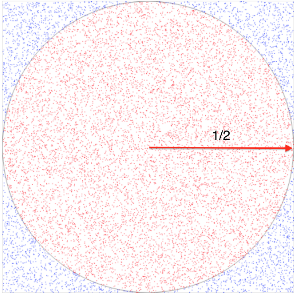
<center>Figura 1: Aproximación de $\pi$ por el método de Monte Carlo

Ahora, tenemos que el área del círculo está dada por $\pi$$r^2$=$\frac{\pi}{4}$, mientras que el área del cuadrado es igual a 1 por lo que, si dividimos el área del círculo entre el área del cuadrado, obtenemos $\frac{\pi}{4}$. Además, si $N_{rojo}$ es el número de puntos rojos y $N_{total}$ es el número total de puntos, entonces $\frac{N_{rojo}}{N_{total}}$ es una aproximación del cociente de las áreas para $N_{total}$ lo suficientemente grande; en otras palabras,

<center>$\frac{\pi}{4}$$\approx$$\frac{N_{rojo}}{N_{total}}$

de donde se sigue que

<center>$\pi$$\approx$$4\frac{N_{rojo}}{N_{total}}$$\tag{1}$


La ecuación (1) nos da la estimación de $\pi$ por el método Monte Carlo

1. Escribe un algoritmo que estime el valor de $\pi$ y que te permita visualizar algo similar al gráfico de la **Figura 2**, asegúrate de incluir el conteo del número de puntos rojos, número de puntos totales, y la respectiva estimación de $\pi$

2. En promedio$^1$, ¿Cuántos puntos necesitas generar para obtener una presición de $\pm$0.01?

3. Realiza una gráfica del error de la estimación en función del número de puntos comparado contra el valor predeterminado de $\pi$ de Julia (que se obtiene llamando a la constante pi).

In [ ]:
z = 1                                      # Primero definimos nuestra variable contador para poner fin al ciclo.
Nrojo = 0                                  # Definimos también nuestras variables que nos serviran para contar
Nazul = 0                                  # la cantidad de puntos dentro y fuera del circulo.

using Plots; gr()                          # Importamos la biblioteca "Plots".

function Circulo(h, k, r)                  # Definimos una función "Circulo" la cual toma los valores de sus
    θ = LinRange(0, 2π, 500)               # coordenadas centrales (h, k) y por otro lado toma el radio de la
    h .+ r * sin.(θ), k .+ r * cos.(θ)     # circunferencia para poder realizar un circulo.
end

plot(Circulo(0.5, 0.5, 0.5), title = "Estimacion de pi", fillalpha = 0.2, legend = false, lw = 0.5, 
    linecolor = "black", aspect_ratio = 1)

# Utilizamos la función circulo para poder gráficar una circunferencia con 0.5 de radio en donde lanzaremos los
# puntos para obtener la estimación de pi.

while z <= 2500                              # Generamos un ciclo que termina cuando "z" alcanza un valor específico.
    
    z += 1                                   # Cada que se complete una "vuelta" al ciclo agregamos 1 a "z" para alcanzar el valor determinado.
        
x = rand(0:0.0001:1)                         # Generamos valores aleatorios para x y para y, entre el área posible del
y = rand(0:0.0001:1)                         # cuadrado tomado, en donde 1 es el valor máximo de las coordenadas.

    w = sqrt(((x - 0.5)^2) + ((y - 0.5)^2))  # Definimos w de tal forma que podamos decir si el punto está dentro o fuera del circulo.
    
if w <= 0.5                                  # Si w es menor o igual a 0.5, podemos decir que el punto está dentro del circulo.

        Nrojo += 1                           # Ya que está dentro del circulo sumamos un punto a los puntos rojos.
        
plot!([x], [y], seriestype = :scatter, label = "", color = "red") # Agregamos los puntos a la gráfica con color rojo.
     

elseif w > 0.5                               # Si w es mayor a 0.5, podemos decir que el punto está fuera del circulo. 
            
        Nazul += 1                           # Ya que está fuera del circulo sumamos un punto a los puntos azules.
        
plot!([x], [y], seriestype = :scatter, label = "", color = "blue") # Agregamos los puntos a la gráfica con color azul.
        
    end                                      # Terminamos el bloque de comando "if".
end                                          # Terminamos el bloque de comando "while".

π1 = (4(Nrojo/(Nrojo + Nazul)))              # Definimos π1 como la estimación de pi.

println("Puntos rojos = $Nrojo")             # Imprimimos la cantidad de puntos rojos.
println("Puntos totales = $(Nrojo + Nazul)") # Imprimimos la cantidad de puntos totales sumando los rojos y azules.
println("Estimación de pi = $π1")            # Imprimimos la estimación de pi.

plot!(Circulo(0.5, 0.5, 0.5), fillalpha = 0.2, legend = false, lw = 0.5, linecolor = "black", aspect_ratio = 1, grid = false)
# Finalmente obtenemos la gráfica.

Puntos rojos = 1939
Puntos totales = 2500
Estimación de pi = 3.1024


## ¿Cuántos puntos necesitas generar para obtener una presición de  ± 0.01?

Aproximadamente se requiere de 10,000 de puntos gráficados para obtener una precisión de 3.14 ± 0.01 

[0.3415926535897933, -0.2584073464102068, -0.458407346410207, -0.1584073464102067, 0.02159265358979301]


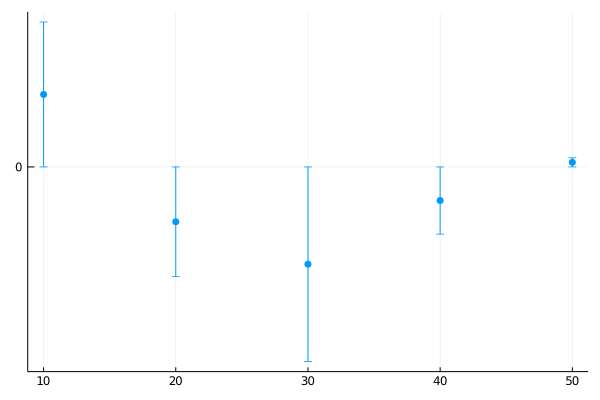

In [15]:
using Plots

z = [10, 20, 30, 40, 50]                     # Tomamos los puntos donde hay 10, 20, 30, 40 y 50 puntos en la gráfica.

estimacion = [2.8 ,3.4 ,3.6 ,3.3, 3.12]      # Y anotamos los valores que nos dan como resultado al realizar la estimación.

error = pi.-estimacion                       # Después le restamos la estimación al valor de pi para obtener el error.
println(error)

scatter([z],[error], yerr = [0.3415926535897933, -0.2584073464102068, -0.458407346410207, -0.1584073464102067, 0.02159265358979301], msc = 1, label = "", ytick = 0:10:60) 
#Gráficamos el error con la cantidad de puntos usados.